# **CONVOLUTIONAL NEURAL NETWORK WITH BASIC KERAS**      

## Loading Libraries

In [0]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
np.random.seed(42)

## **Working on CIFAR10 Data**

Pipeline for all the experiments
* Loading images                                        
* Reshaping (Train images, labels) and (Test images, labels)               
* Defining Batch Size                                    
* Standardizing both Training and Testing data

In [0]:
(train_images,train_labels), (test_images,test_labels) = datasets.cifar10.load_data()

train_labels = train_labels.reshape((-1))
train_data= tf.data.Dataset.from_tensor_slices((train_images.reshape([-1,32,32,3]).astype(np.float32)/255, train_labels.astype(np.int32)))

train_data= train_data.shuffle(buffer_size=60000).batch(128).repeat()

test_labels = test_labels.reshape((-1))
test_data = tf.data.Dataset.from_tensor_slices((test_images.reshape([-1,32,32,3]).astype(np.float32)/255, test_labels.astype(np.int32))).batch(10000)


## **Experiment1:**           
Perimeters:
1. Convolutional Layers: 3
2. Filter size         : 3, 3, 3
3. Number of Filters   : 16, 32, 64
4. Padding             : valid
5. Pooling size        : 2x2
6. Optimizer           : Adam



In [0]:
model1 = models.Sequential()
model1.add(layers.Conv2D(16, kernel_size=3, padding ='valid', activation='relu', input_shape=(32,32,3)))
model1.add(layers.MaxPool2D((2,2)))                                                     
model1.add(layers.Conv2D(32, kernel_size=3, padding ='valid', activation='relu'))       
model1.add(layers.MaxPool2D((2,2)))                                                     
model1.add(layers.Conv2D(64, kernel_size=3, padding ='valid', activation='relu'))                  
model1.add(layers.Flatten())                                                           
model1.add(layers.Dense(64,activation='relu'))                                               
model1.add(layers.Dense(10))                                                           

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

Training the model and checking accuracy

In [0]:
varis = model1.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model1(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

Loss: 2.300624370574951 , Training Accuracy: 0.1171875
Loss: 1.9667110443115234 , Training Accuracy: 0.28125
Loss: 1.604838252067566 , Training Accuracy: 0.4609375
Loss: 1.4557592868804932 , Training Accuracy: 0.453125
Loss: 1.4034475088119507 , Training Accuracy: 0.4765625
Loss: 1.4471840858459473 , Training Accuracy: 0.46875
Loss: 1.3984029293060303 , Training Accuracy: 0.4375
Loss: 1.3106766939163208 , Training Accuracy: 0.5234375
Loss: 1.306623935699463 , Training Accuracy: 0.53125
Loss: 1.29557204246521 , Training Accuracy: 0.5546875
Loss: 1.2981810569763184 , Training Accuracy: 0.5859375
Loss: 1.2226500511169434 , Training Accuracy: 0.5625
Loss: 1.1770005226135254 , Training Accuracy: 0.5703125
Loss: 1.3250458240509033 , Training Accuracy: 0.609375
Loss: 1.1014833450317383 , Training Accuracy: 0.5625
Loss: 1.0155524015426636 , Training Accuracy: 0.6640625
Loss: 1.024159550666809 , Training Accuracy: 0.6796875
Loss: 1.0783638954162598 , Training Accuracy: 0.6015625
Loss: 1.0526838

Checking Testing Accuracy

In [0]:
big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model1(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))

Testing Accuracy: 0.6657999753952026


## PLotting Feature Map

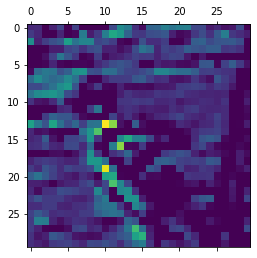

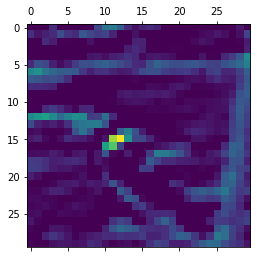

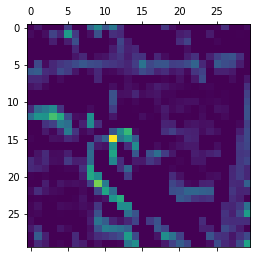

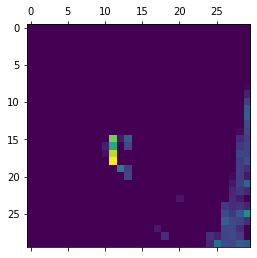

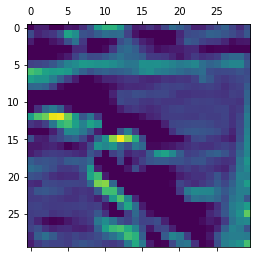

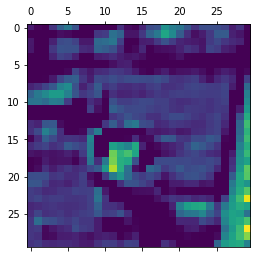

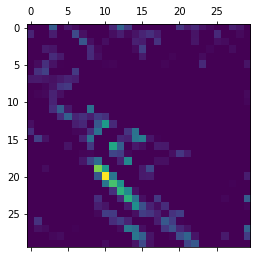

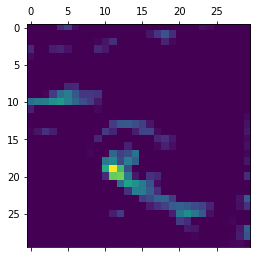

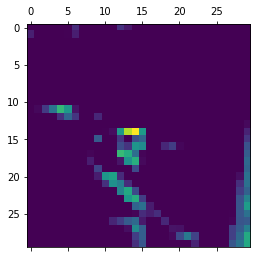

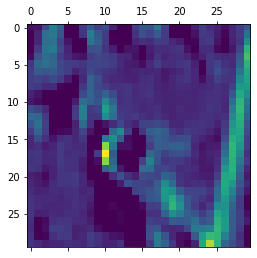

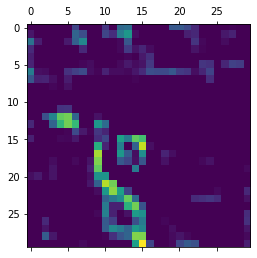

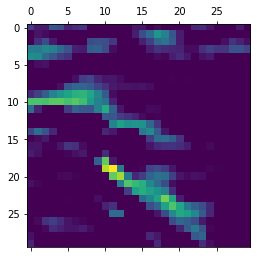

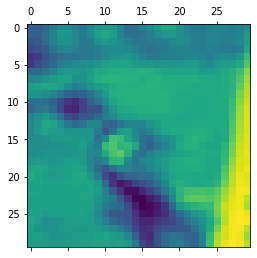

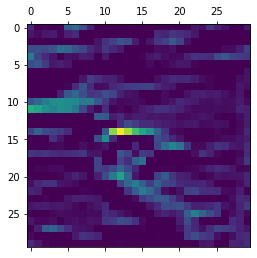

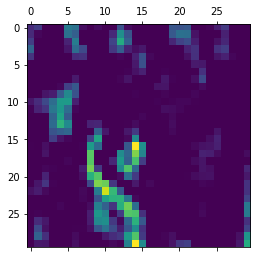

In [0]:
# layers = [layer.output for layer in model.layers]
#print(model)
layers =  (model1.layers[0]).output

activation_model = models.Model(inputs = model1.input, outputs = layers)

for step, (img_batch, lbl_batch) in enumerate(train_data):
    act_map_batch = activation_model.predict_on_batch(img_batch)
    for idx in range(0, 15):
      plt.matshow(act_map_batch[0, :, :, idx])
    break
  

## **Experiment2:**           
Perimeters:
1. Convolutional Layers: 4
2. Filter size         : 2, 3, 4, 5
3. Number of Filters   : 8, 16, 32, 64
4. Padding             : valid
5. Pooling size        : 2x2
6. Optimizer           : Adam


In [0]:
model2 = models.Sequential()
model2.add(layers.Conv2D(8, kernel_size=2, activation='relu', input_shape=(32,32,3)))
#model2.add(layers.MaxPool2D((2,2)))                                                     
model2.add(layers.Conv2D(16, kernel_size=3, activation='relu'))       
model2.add(layers.MaxPool2D((2,2)))                                                     
model2.add(layers.Conv2D(32, kernel_size=4, activation='relu'))     
model2.add(layers.MaxPool2D((2,2)))      
model2.add(layers.Conv2D(64, kernel_size=5,  activation='relu'))        
model2.add(layers.Flatten())                                                           
model2.add(layers.Dense(64,activation='relu'))                                               
model2.add(layers.Dense(10))                                                           

model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 8)         104       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 64)          51264     
_________________________________________________________________
flatten (Flatten)            (None, 64)               

In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model2.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model2(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model2(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))

Loss: 2.3075156211853027 , Training Accuracy: 0.09375
Loss: 1.6337770223617554 , Training Accuracy: 0.421875
Loss: 1.7234519720077515 , Training Accuracy: 0.375
Loss: 1.5476269721984863 , Training Accuracy: 0.4296875
Loss: 1.489339828491211 , Training Accuracy: 0.421875
Loss: 1.355763554573059 , Training Accuracy: 0.5078125
Loss: 1.137675404548645 , Training Accuracy: 0.6015625
Loss: 1.3502293825149536 , Training Accuracy: 0.5546875
Loss: 1.3263591527938843 , Training Accuracy: 0.53125
Loss: 1.1676212549209595 , Training Accuracy: 0.5625
Loss: 1.1910139322280884 , Training Accuracy: 0.5078125
Loss: 1.3311299085617065 , Training Accuracy: 0.5625
Loss: 1.1991400718688965 , Training Accuracy: 0.5390625
Loss: 1.1371492147445679 , Training Accuracy: 0.59375
Loss: 1.0729364156723022 , Training Accuracy: 0.6328125
Loss: 1.0934991836547852 , Training Accuracy: 0.6015625
Loss: 1.030316710472107 , Training Accuracy: 0.6796875
Loss: 1.110168218612671 , Training Accuracy: 0.5859375
Loss: 1.0737450

## **Experiment3:**           
Perimeters:
1. Convolutional Layers: 3
2. Filter size         : 3, 3, 3
3. Number of Filters   : 64, 128, 256
4. Padding             : valid
5. Pooling size        : 2x2
6. MLP                 : 128,64,32
6. Optimizer           : Adam

In [0]:
model3 = models.Sequential()
model3.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model3.add(layers.MaxPool2D((2,2)))                                                     
model3.add(layers.Conv2D(128, kernel_size=3, activation='relu'))       
model3.add(layers.MaxPool2D((2,2)))                                                     
model3.add(layers.Conv2D(256, kernel_size=3, activation='relu'))             
model3.add(layers.Flatten())                                                           
model3.add(layers.Dense(128,activation='relu')) 
model3.add(layers.Dense(64,activation='relu')) 
model2.add(layers.Dense(32,activation='relu'))                                               
model3.add(layers.Dense(10))                                                           

model3.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model3.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model3(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model3(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))

Loss: 2.3031864166259766 , Training Accuracy: 0.09375
Loss: 1.7866015434265137 , Training Accuracy: 0.3359375
Loss: 1.4832905530929565 , Training Accuracy: 0.4453125
Loss: 1.3184196949005127 , Training Accuracy: 0.5078125
Loss: 1.355057716369629 , Training Accuracy: 0.484375
Loss: 1.2606264352798462 , Training Accuracy: 0.5625
Loss: 1.123429775238037 , Training Accuracy: 0.6328125
Loss: 1.1823571920394897 , Training Accuracy: 0.546875
Loss: 1.1997740268707275 , Training Accuracy: 0.6328125
Loss: 1.147373080253601 , Training Accuracy: 0.6171875
Loss: 1.0497307777404785 , Training Accuracy: 0.640625
Loss: 0.9330858588218689 , Training Accuracy: 0.6875
Loss: 1.0080128908157349 , Training Accuracy: 0.65625
Loss: 0.9583643674850464 , Training Accuracy: 0.6484375
Loss: 1.1143784523010254 , Training Accuracy: 0.6171875
Loss: 0.9737110137939453 , Training Accuracy: 0.6171875
Loss: 0.7304037809371948 , Training Accuracy: 0.7734375
Loss: 0.8357278108596802 , Training Accuracy: 0.71875
Loss: 0.74

## **Experiment4:**           
Perimeters:
1. Convolutional Layers: 3
2. Filter size         : 2, 2, 2
3. Number of Filters   : 128, 256, 512
4. Padding             : valid
5. Pooling size        : 2x2
6. MLP                 : 128,64,32
6. Optimizer           : Adam

In [0]:
model4 = models.Sequential()
model4.add(layers.Conv2D(128, kernel_size=2, activation='relu', input_shape=(32,32,3)))
model4.add(layers.MaxPool2D((2,2)))                                                     
model4.add(layers.Conv2D(256, kernel_size=2, activation='relu'))       
model4.add(layers.MaxPool2D((2,2)))                                                     
model4.add(layers.Conv2D(512, kernel_size=2, activation='relu'))             
model4.add(layers.Flatten())                                                           
model4.add(layers.Dense(128,activation='relu')) 
model4.add(layers.Dense(64,activation='relu')) 
model4.add(layers.Dense(32,activation='relu'))                                               
model4.add(layers.Dense(10))                                                           

model4.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 31, 31, 128)       1664      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 256)       131328    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 512)         524800    
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model4.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model4(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model4(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))

Loss: 2.3014087677001953 , Training Accuracy: 0.1015625
Loss: 1.7238237857818604 , Training Accuracy: 0.4375
Loss: 1.5466251373291016 , Training Accuracy: 0.4375
Loss: 1.4181641340255737 , Training Accuracy: 0.5234375
Loss: 1.0148266553878784 , Training Accuracy: 0.6640625
Loss: 1.156887412071228 , Training Accuracy: 0.6015625
Loss: 0.976675808429718 , Training Accuracy: 0.6953125
Loss: 1.2331790924072266 , Training Accuracy: 0.5625
Loss: 0.9183098673820496 , Training Accuracy: 0.671875
Loss: 0.8889359831809998 , Training Accuracy: 0.7265625
Loss: 0.8481247425079346 , Training Accuracy: 0.671875
Loss: 0.8209285736083984 , Training Accuracy: 0.71875
Loss: 0.8249791264533997 , Training Accuracy: 0.6953125
Loss: 0.797888994216919 , Training Accuracy: 0.7265625
Loss: 0.6289613246917725 , Training Accuracy: 0.765625
Loss: 0.8374896049499512 , Training Accuracy: 0.6875
Loss: 0.7075105905532837 , Training Accuracy: 0.7578125
Loss: 0.5898147821426392 , Training Accuracy: 0.78125
Loss: 0.673135

## **Experiment5:**           
Perimeters:
1. Convolutional Layers: 6
2. Filter size         : 5, 5, 5, 5, 5, 5
3. Number of Filters   : 8, 16, 32, 64, 128, 256
4. Padding             : valid
5. Pooling size        : None
6. MLP                 : 64
6. Optimizer           : Adam

In [0]:
model5 = models.Sequential()
model5.add(layers.Conv2D(8, kernel_size=5, activation='relu', input_shape=(32,32,3)))                                                    
model5.add(layers.Conv2D(16, kernel_size=5, activation='relu'))                                                         
model5.add(layers.Conv2D(32, kernel_size=5, activation='relu'))  
model5.add(layers.Conv2D(64, kernel_size=5, activation='relu')) 
model5.add(layers.Conv2D(128, kernel_size=5, activation='relu'))
model5.add(layers.Conv2D(256, kernel_size=5, activation='relu'))

model5.add(layers.Flatten())                                                           
model5.add(layers.Dense(64,activation='relu'))                                               
model5.add(layers.Dense(10))                                                           

model5.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         608       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        3216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        12832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       204928    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         819456    
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model5.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model5(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model5(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))

Loss: 2.3027544021606445 , Training Accuracy: 0.0703125
Loss: 1.9622952938079834 , Training Accuracy: 0.3125
Loss: 1.717214584350586 , Training Accuracy: 0.28125
Loss: 1.6381325721740723 , Training Accuracy: 0.3203125
Loss: 1.56148099899292 , Training Accuracy: 0.4296875
Loss: 1.446455955505371 , Training Accuracy: 0.5078125
Loss: 1.447513222694397 , Training Accuracy: 0.4140625
Loss: 1.536813735961914 , Training Accuracy: 0.4453125
Loss: 1.4874175786972046 , Training Accuracy: 0.4296875
Loss: 1.3586819171905518 , Training Accuracy: 0.5078125
Loss: 1.4726195335388184 , Training Accuracy: 0.453125
Loss: 1.3651080131530762 , Training Accuracy: 0.515625
Loss: 1.119334101676941 , Training Accuracy: 0.6171875
Loss: 1.2461879253387451 , Training Accuracy: 0.5390625
Loss: 1.3954963684082031 , Training Accuracy: 0.5
Loss: 1.2642841339111328 , Training Accuracy: 0.5390625
Loss: 1.1781227588653564 , Training Accuracy: 0.5625
Loss: 1.0405137538909912 , Training Accuracy: 0.6328125
Loss: 1.2760003

## **Experiment6:**           
Perimeters:
1. Convolutional Layers: 3
2. Filter size         : 2, 2, 2
3. Number of Filters   : 64, 128, 256
4. Padding             : same
5. Pooling size        : 2x2
6. MLP                 : 64
6. Optimizer           : Adam

In [0]:
model6 = models.Sequential()
model6.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3),padding='SAME'))
model6.add(layers.MaxPool2D((2,2)))                                                     
model6.add(layers.Conv2D(128, kernel_size=3,padding='SAME', activation='relu'))       
model6.add(layers.MaxPool2D((2,2)))                                                     
model6.add(layers.Conv2D(256, kernel_size=3,padding='SAME' ,activation='relu'))             
model6.add(layers.Flatten())                                                            
model6.add(layers.Dense(64,activation='relu'))                                              
model6.add(layers.Dense(10))                                                           

model6.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model6.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model6(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model6(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))

Loss: 2.305060863494873 , Training Accuracy: 0.078125
Loss: 1.6385430097579956 , Training Accuracy: 0.4140625
Loss: 1.4642360210418701 , Training Accuracy: 0.5
Loss: 1.2100908756256104 , Training Accuracy: 0.59375
Loss: 1.2779568433761597 , Training Accuracy: 0.53125
Loss: 1.0192108154296875 , Training Accuracy: 0.6484375
Loss: 0.7934401631355286 , Training Accuracy: 0.71875
Loss: 1.1108875274658203 , Training Accuracy: 0.5703125
Loss: 0.7610743045806885 , Training Accuracy: 0.7421875
Loss: 0.7489714622497559 , Training Accuracy: 0.7265625
Loss: 0.8186100125312805 , Training Accuracy: 0.71875
Loss: 0.8211299180984497 , Training Accuracy: 0.703125
Loss: 0.5839905142784119 , Training Accuracy: 0.8125
Loss: 0.7122930288314819 , Training Accuracy: 0.7265625
Loss: 0.7642565965652466 , Training Accuracy: 0.734375
Loss: 0.6516357660293579 , Training Accuracy: 0.796875
Loss: 0.5799968838691711 , Training Accuracy: 0.7578125
Loss: 0.6711187958717346 , Training Accuracy: 0.734375
Loss: 0.6592891

## **Experiment7:**           
Perimeters:
1. Convolutional Layers: 4
2. Filter size         : 3
3. Number of Filters   : 64,128,256,256
4. Padding             : same
5. Pooling size        : 2x2
6. MLP                 : 64
6. Optimizer           : Adam

In [0]:
model7 = models.Sequential()
model7.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3),padding='SAME'))
model7.add(layers.MaxPool2D((2,2)))                                                     
model7.add(layers.Conv2D(128, kernel_size=3,padding='SAME', activation='relu'))       
model7.add(layers.MaxPool2D((2,2)))                                                     
model7.add(layers.Conv2D(256, kernel_size=3,padding='SAME' ,activation='relu')) 
model7.add(layers.MaxPool2D((2,2)))  
model7.add(layers.Conv2D(256, kernel_size=3,padding='SAME', activation='relu'))        
model7.add(layers.Flatten())                                                            
model7.add(layers.Dense(64,activation='relu'))                                              
model7.add(layers.Dense(10))                                                           

model7.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 256)        

In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model7.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model7(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model7(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))

Loss: 2.3073935508728027 , Training Accuracy: 0.0625
Loss: 1.5296231508255005 , Training Accuracy: 0.421875
Loss: 1.625436782836914 , Training Accuracy: 0.4140625
Loss: 1.4409584999084473 , Training Accuracy: 0.515625
Loss: 1.121029019355774 , Training Accuracy: 0.6640625
Loss: 1.0493897199630737 , Training Accuracy: 0.6328125
Loss: 0.8511364459991455 , Training Accuracy: 0.6875
Loss: 0.9488412141799927 , Training Accuracy: 0.640625
Loss: 1.1390575170516968 , Training Accuracy: 0.5703125
Loss: 0.8113158345222473 , Training Accuracy: 0.6640625
Loss: 0.7070416808128357 , Training Accuracy: 0.7578125
Loss: 0.9397412538528442 , Training Accuracy: 0.6796875
Loss: 0.7565799951553345 , Training Accuracy: 0.7421875
Loss: 0.8679108023643494 , Training Accuracy: 0.671875
Loss: 0.680148720741272 , Training Accuracy: 0.7421875
Loss: 0.6920697093009949 , Training Accuracy: 0.78125
Loss: 0.6281121373176575 , Training Accuracy: 0.78125
Loss: 0.5232665538787842 , Training Accuracy: 0.8125
Loss: 0.4779

## **Experiment8:**           
Perimeters:
1. Convolutional Layers: 4
2. Filter size         : 3, 3, 3, 3
3. Number of Filters   : 54,128,256, 256
4. Padding             : same
5. Strides             : 2
5. Pooling size        : 2x2
6. MLP                 : 64
6. Optimizer           : Adam

In [0]:
model8 = models.Sequential()
model8.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3),padding='SAME',strides=2))
model8.add(layers.MaxPool2D((2,2)))                                                     
model8.add(layers.Conv2D(128, kernel_size=3,padding='SAME', activation='relu'))       
model8.add(layers.MaxPool2D((2,2)))                                                     
model8.add(layers.Conv2D(256, kernel_size=3,padding='SAME' ,activation='relu')) 
model8.add(layers.MaxPool2D((2,2)))  
model8.add(layers.Conv2D(256, kernel_size=3,padding='SAME', activation='relu'))        
model8.add(layers.Flatten())                                                            
model8.add(layers.Dense(64,activation='relu'))                                              
model8.add(layers.Dense(10))                                                           

model8.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 16, 16, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 2, 2, 256)        

In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model8.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model8(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model8(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))

Loss: 2.3022735118865967 , Training Accuracy: 0.125
Loss: 1.70900297164917 , Training Accuracy: 0.3359375
Loss: 1.5670043230056763 , Training Accuracy: 0.375
Loss: 1.3495638370513916 , Training Accuracy: 0.5390625
Loss: 1.3622633218765259 , Training Accuracy: 0.515625
Loss: 1.2661454677581787 , Training Accuracy: 0.59375
Loss: 1.3007421493530273 , Training Accuracy: 0.5234375
Loss: 1.204768419265747 , Training Accuracy: 0.5703125
Loss: 1.158031940460205 , Training Accuracy: 0.59375
Loss: 1.1684603691101074 , Training Accuracy: 0.5859375
Loss: 0.8541824221611023 , Training Accuracy: 0.71875
Loss: 0.8433650135993958 , Training Accuracy: 0.703125
Loss: 0.781155526638031 , Training Accuracy: 0.734375
Loss: 0.8145654201507568 , Training Accuracy: 0.7109375
Loss: 0.8051390647888184 , Training Accuracy: 0.7109375
Loss: 0.7331868410110474 , Training Accuracy: 0.75
Loss: 0.7036746740341187 , Training Accuracy: 0.765625
Loss: 0.6529586315155029 , Training Accuracy: 0.765625
Loss: 0.6504294872283

## **Experiment9:**           
Perimeters:
1. Convolutional Layers: 2
2. Filter size         : 3, 3
3. Number of Filters   : 64,128
4. Padding             : valid
5. Strides             : 2
5. Pooling size        : 2x2
6. MLP                 : 64
6. Optimizer           : Adam

In [0]:
model9 = models.Sequential()
model9.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,3),strides=2))
model9.add(layers.MaxPool2D((2,2)))                                                     
model9.add(layers.Conv2D(128, kernel_size=3, activation='relu'))               
model9.add(layers.Flatten())                                                            
model9.add(layers.Dense(64,activation='relu'))                                              
model9.add(layers.Dense(10))                                                           

model9.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 15, 15, 64)        1792      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                204864    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 281,162
Trainable params: 281,162
Non-trainable params: 0
________________________________________________

In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model9.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model9(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model9(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))

Loss: 2.306058645248413 , Training Accuracy: 0.1015625
Loss: 1.9168498516082764 , Training Accuracy: 0.28125
Loss: 1.530848503112793 , Training Accuracy: 0.4453125
Loss: 1.5145246982574463 , Training Accuracy: 0.46875
Loss: 1.2831971645355225 , Training Accuracy: 0.5546875
Loss: 1.3941478729248047 , Training Accuracy: 0.4453125
Loss: 1.4657349586486816 , Training Accuracy: 0.453125
Loss: 1.2969887256622314 , Training Accuracy: 0.5625
Loss: 1.1166893243789673 , Training Accuracy: 0.609375
Loss: 1.1351597309112549 , Training Accuracy: 0.59375
Loss: 1.1608309745788574 , Training Accuracy: 0.5390625
Loss: 1.2535851001739502 , Training Accuracy: 0.546875
Loss: 1.0549650192260742 , Training Accuracy: 0.6015625
Loss: 1.1254420280456543 , Training Accuracy: 0.6015625
Loss: 0.9132726192474365 , Training Accuracy: 0.6953125
Loss: 0.8692132234573364 , Training Accuracy: 0.703125
Loss: 1.0963664054870605 , Training Accuracy: 0.6796875
Loss: 1.0112707614898682 , Training Accuracy: 0.609375
Loss: 0.

## **Experiment10:**           
Perimeters:
1. Convolutional Layers: 1
2. Filter size         : same as input
3. Number of Filters   : 512
4. Padding             : valid
5. Strides             : none
5. Pooling size        : none
6. MLP                 : 64
6. Optimizer           : Adam

In [0]:
model10 = models.Sequential()
model10.add(layers.Conv2D(512, kernel_size=32, activation='relu', input_shape=(32,32,3)))               
model10.add(layers.Flatten())                                                            
model10.add(layers.Dense(64,activation='relu'))                                              
model10.add(layers.Dense(10))                                                           

model10.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 1, 1, 512)         1573376   
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 1,606,858
Trainable params: 1,606,858
Non-trainable params: 0
_________________________________________________________________


In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model10.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model10(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model10(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))


Loss: 2.2988972663879395 , Training Accuracy: 0.140625
Loss: 1.9658962488174438 , Training Accuracy: 0.2890625
Loss: 1.8931949138641357 , Training Accuracy: 0.2890625
Loss: 1.7864571809768677 , Training Accuracy: 0.3515625
Loss: 1.6433165073394775 , Training Accuracy: 0.3359375
Loss: 1.7078461647033691 , Training Accuracy: 0.3671875
Loss: 1.6511478424072266 , Training Accuracy: 0.4375
Loss: 1.705479621887207 , Training Accuracy: 0.359375
Loss: 1.7426717281341553 , Training Accuracy: 0.4453125
Loss: 1.5524719953536987 , Training Accuracy: 0.4765625
Loss: 1.6888538599014282 , Training Accuracy: 0.4296875
Loss: 1.5717694759368896 , Training Accuracy: 0.4453125
Loss: 1.7127866744995117 , Training Accuracy: 0.359375
Loss: 1.601914644241333 , Training Accuracy: 0.4375
Loss: 1.6689512729644775 , Training Accuracy: 0.3671875
Loss: 1.543769359588623 , Training Accuracy: 0.5078125
Loss: 1.7052122354507446 , Training Accuracy: 0.4140625
Loss: 1.634873628616333 , Training Accuracy: 0.421875
Loss: 

## **Experiment11:**           
Perimeters:
1. Convolutional Layers: 1
2. Filter size         : 1
3. Number of Filters   : 32
4. Padding             : valid
5. Strides             : none
5. Pooling size        : none
6. MLP                 : 64
6. Optimizer           : Adam

In [0]:
model11 = models.Sequential()
model11.add(layers.Conv2D(32, kernel_size=1, activation='relu', input_shape=(32,32,3)))               
model11.add(layers.Flatten())                                                            
model11.add(layers.Dense(64,activation='relu'))                                              
model11.add(layers.Dense(10))                                                           

model11.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        128       
_________________________________________________________________
flatten_12 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                2097216   
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 2,097,994
Trainable params: 2,097,994
Non-trainable params: 0
_________________________________________________________________


In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model11.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model11(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model11(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))


Loss: 2.3291096687316895 , Training Accuracy: 0.1015625
Loss: 2.0208239555358887 , Training Accuracy: 0.2578125
Loss: 1.754199504852295 , Training Accuracy: 0.359375
Loss: 1.7402793169021606 , Training Accuracy: 0.359375
Loss: 1.7443790435791016 , Training Accuracy: 0.3671875
Loss: 1.6664469242095947 , Training Accuracy: 0.421875
Loss: 1.649550437927246 , Training Accuracy: 0.40625
Loss: 1.6223154067993164 , Training Accuracy: 0.4453125
Loss: 1.6268258094787598 , Training Accuracy: 0.375
Loss: 1.6494320631027222 , Training Accuracy: 0.3671875
Loss: 1.5538921356201172 , Training Accuracy: 0.3984375
Loss: 1.5219794511795044 , Training Accuracy: 0.3828125
Loss: 1.681654453277588 , Training Accuracy: 0.421875
Loss: 1.5997419357299805 , Training Accuracy: 0.453125
Loss: 1.7121191024780273 , Training Accuracy: 0.421875
Loss: 1.5039198398590088 , Training Accuracy: 0.46875
Loss: 1.3756216764450073 , Training Accuracy: 0.5546875
Loss: 1.6321089267730713 , Training Accuracy: 0.453125
Loss: 1.46

## **Experiment12:**           
Perimeters:
1. Convolutional Layers: 6
2. Filter size         : 3, 3, 3, 3, 3, 3
3. Number of Filters   : 32, 32, 64, 64 , 256, 256
4. Padding             : Same
5. Strides             : none
5. Pooling size        : (2x2)x3
6. MLP                 : 128
6. Optimizer           : Adam

In [0]:
model12 = models.Sequential()
model12.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3),padding='SAME'))
model12.add(layers.Conv2D(32, kernel_size=3, activation='relu',padding='SAME'))
model12.add(layers.MaxPool2D((2,2)))                                                     
model12.add(layers.Conv2D(64, kernel_size=3, activation='relu',padding='SAME'))
model12.add(layers.Conv2D(64, kernel_size=3, activation='relu',padding='SAME'))
model12.add(layers.MaxPool2D((2,2))) 
model12.add(layers.Conv2D(256, kernel_size=3, activation='relu',padding='SAME'))
model12.add(layers.Conv2D(256, kernel_size=3, activation='relu',padding='SAME'))
model12.add(layers.MaxPool2D((2,2)))               
model12.add(layers.Flatten())                                                            
model12.add(layers.Dense(128,activation='relu'))                                              
model12.add(layers.Dense(10))                                                           

model12.summary()


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 8, 8, 256)       

In [0]:
train_steps = 5000
opt = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

varis = model12.trainable_variables
for step,(img_batch, lbl_batch) in enumerate(train_data):
  if step > train_steps:
    break
  
  with tf.GradientTape() as tape:
    logits = model12(img_batch)
    xent   = loss_fn(lbl_batch, logits) 
  grads = tape.gradient(xent,varis)
  opt.apply_gradients(zip(grads, varis))

  if not step%100:
    train_preds = tf.argmax(logits, axis = 1, output_type = tf.int32)
    train_acc   = tf.reduce_mean(tf.cast(tf.equal(train_preds, lbl_batch), tf.float32))
    print("Loss: {} , Training Accuracy: {}".format(xent, train_acc))

big_test_batch = next(iter(test_data))
test_preds = tf.argmax(model12(big_test_batch[0]), axis=1,
                       output_type=tf.int32)
test_acc   = tf.reduce_mean(tf.cast(tf.equal(test_preds, big_test_batch[1]),
                             tf.float32))
print('Testing Accuracy: {}'.format(test_acc))


Loss: 2.303126811981201 , Training Accuracy: 0.1328125
Loss: 1.6696815490722656 , Training Accuracy: 0.3828125
Loss: 1.3683395385742188 , Training Accuracy: 0.515625
Loss: 1.149886965751648 , Training Accuracy: 0.5859375
Loss: 1.152062177658081 , Training Accuracy: 0.578125
Loss: 0.9867528080940247 , Training Accuracy: 0.6484375
Loss: 0.9579265117645264 , Training Accuracy: 0.6640625
Loss: 1.0198173522949219 , Training Accuracy: 0.671875
Loss: 1.0386528968811035 , Training Accuracy: 0.6484375
Loss: 0.6826795935630798 , Training Accuracy: 0.75
Loss: 0.6753023862838745 , Training Accuracy: 0.765625
Loss: 0.7563391923904419 , Training Accuracy: 0.7109375
Loss: 0.7444609999656677 , Training Accuracy: 0.75
Loss: 0.7185227870941162 , Training Accuracy: 0.7421875
Loss: 0.675014853477478 , Training Accuracy: 0.765625
Loss: 0.6253034472465515 , Training Accuracy: 0.78125
Loss: 0.7299389243125916 , Training Accuracy: 0.7265625
Loss: 0.4688880741596222 , Training Accuracy: 0.828125
Loss: 0.494562

## All model's Parameters and performance are mentioned below:-

Model | Conv Layer | No. of Filters | Filter Size| MLP| Pooling_size | Padding | Strides |Training Acc | Testing Acc
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
1 | 3 | 16-32-64 | 3-3-3 | 64-10 | (2x2)x2 | VALID | None | 0.69 | 0.66
2 | 4 | 8-16-32-64 | 2-3-4-5 | 64-10 |(2x2)x1 | VALID | None | 0.71 | 0.68
3 | 3 | 64-128-256 | 3-3-3 | 128-64-32-10 | (2x2)x2 | VALID | None | 0.82 | 0.73
4 | 4 | 128-256-512 | 2-2-2 |128-64-32-10 | (2x2)x2 | VALID | None | 0.96 | 0.72
5 | 6 | 8-16-32-64-128-256 | 5-5-5-5-5-5 | 64-10 | None | VALID | None | 0.73 | 0.63
6 | 3 | 64-128-256 | 3-3-3 | 64-10 | (2x2)x2 | SAME | None | 0.97 | 0.75
7 | 4 | 64-128-256-256 | 3-3-3-3 | 64-10 | (2x2)x3 | SAME | None | 1.0 | 0.75
8 | 4 | 64-128-256-256 | 3-3-3-3 | 64-10 | (2x2)x3 | SAME | 2 | 0.97 | 0.71
9 | 2 | 64-128 | 3-3 | 64-10 | 2x2 | VALID | 2 | 0.78 | 0.69
10 | 1 | 512 | 32 | 64-10 | None | VALID | None | 0.52 | 0.47
11 | 1 | 32 | 1 | 64-10 | None | VALID | None | 0.5 | 0.48
12 | 6 | 32-32-64-64-256-256 | 3-3-3-3-3-3 | 128-10 | (2x2)x3 | SAME | None | 0.96 | 0.77